# ACME Happiness Survey 2020 - Apziva Project 1

This project involves classifying customers by satisfaction based on multiple factors. This project is split into two parts: The first is a classification model using linear and logistic regression, the second part involves an analysis of the factors to determine which are most predictive.

In [1]:
#Import data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import metrics

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

data = pd.read_csv('ACME-HappinessSurvey2020.csv')
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


# 1.0 Exploratory Data Analysis

In [2]:
#Variance

columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
X = data[columns]
y = data['Y']

print(y.value_counts(), '\n')

for label in columns:
    print(f'{data[label].value_counts()}\nVar: {np.var(data[label])}\n')

1    69
0    57
Name: Y, dtype: int64 

5    65
4    40
3    20
1     1
Name: X1, dtype: int64
Var: 0.6349206349206349

3    42
2    34
1    27
4    17
5     6
Name: X2, dtype: int64
Var: 1.2331191735953648

3    55
4    33
5    17
2    14
1     7
Name: X3, dtype: int64
Var: 1.0391156462585052

4    53
3    41
5    25
2     5
1     2
Name: X4, dtype: int64
Var: 0.7608969513731412

4    50
5    31
3    22
2    16
1     7
Name: X5, dtype: int64
Var: 1.3066263542454015

5    57
4    47
3    20
1     1
2     1
Name: X6, dtype: int64
Var: 0.6497858402620306



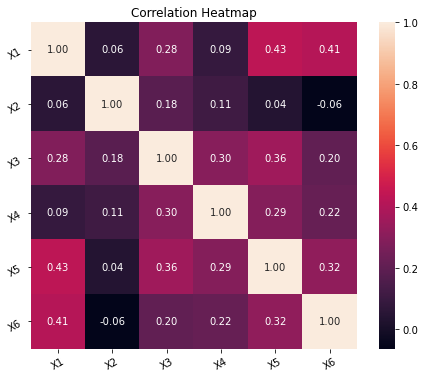

In [3]:
#Correlation

corr_matrix = X.corr()

#Plot Heatmap

plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show() 

In [4]:
#Drop columns with high correlation.

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.4)]
print(to_drop)

['X5', 'X6']


In [5]:
#ANOVA F Value

fvalue_selector = SelectKBest(f_classif, k=2)

X_kbest = fvalue_selector.fit_transform(X, y)

X_kbest

array([[3, 2],
       [3, 4],
       [5, 3],
       [5, 3],
       [5, 3],
       [5, 5],
       [3, 1],
       [5, 4],
       [4, 4],
       [4, 5],
       [3, 2],
       [4, 4],
       [5, 5],
       [4, 4],
       [4, 4],
       [3, 4],
       [5, 4],
       [5, 4],
       [5, 4],
       [4, 4],
       [4, 4],
       [4, 5],
       [4, 5],
       [5, 2],
       [4, 3],
       [3, 2],
       [3, 5],
       [3, 3],
       [3, 3],
       [5, 5],
       [5, 5],
       [4, 4],
       [3, 4],
       [3, 4],
       [4, 1],
       [4, 4],
       [5, 4],
       [5, 4],
       [5, 2],
       [4, 2],
       [5, 3],
       [4, 2],
       [5, 4],
       [4, 2],
       [3, 3],
       [5, 4],
       [5, 4],
       [1, 1],
       [5, 5],
       [5, 4],
       [5, 4],
       [5, 4],
       [5, 4],
       [5, 4],
       [4, 3],
       [4, 3],
       [5, 3],
       [4, 3],
       [5, 4],
       [5, 2],
       [4, 3],
       [5, 5],
       [5, 5],
       [5, 5],
       [4, 4],
       [4, 4],
       [3,

In [6]:
#Keep X1 and X5.

## 1.1 Logistic Regression

In [7]:
kf = KFold(n_splits=6, shuffle=True, random_state=1)

logreg = LogisticRegression()

scores = cross_val_score(logreg, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f'Accuracy (include all): {np.mean(scores)*100}%')

#Drop by variance.

columns = ['X2', 'X3', 'X5']
X_drop_var = data[columns]

scores = cross_val_score(logreg, X_drop_var, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f'Accuracy (variance): {np.mean(scores)*100}%')

#Drop by correlation.

columns = ['X1', 'X2', 'X3', 'X4']
X_drop_corr = data[columns]

scores = cross_val_score(logreg, X_drop_corr, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f'Accuracy (corralation): {np.mean(scores)*100}%')

#Keep by ANOVA

columns = ['X1', 'X5']
X_keep_ANOVA = data[columns]

scores = cross_val_score(logreg, X_keep_ANOVA, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f'Accuracy (ANOVA): {np.mean(scores)*100}%')

Accuracy (include all): 52.38095238095239%
Accuracy (variance): 53.96825396825397%
Accuracy (corralation): 53.96825396825397%
Accuracy (ANOVA): 57.14285714285713%


## 1.2 XGBoost

In [8]:
xgb = XGBClassifier()

scores = cross_val_score(xgb, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f'Accuracy (include all): {np.mean(scores)*100}%')

#Drop by variance.

scores = cross_val_score(xgb, X_drop_var, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f'Accuracy (variance): {np.mean(scores)*100}%')

#Drop by correlation.

scores = cross_val_score(xgb, X_drop_corr, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f'Accuracy (correlation): {np.mean(scores)*100}%')

#Keep by ANOVA

scores = cross_val_score(xgb, X_keep_ANOVA, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f'Accuracy (ANOVA): {np.mean(scores)*100}%')

Accuracy (include all): 60.317460317460316%
Accuracy (variance): 53.17460317460318%
Accuracy (correlation): 53.96825396825397%
Accuracy (ANOVA): 63.49206349206349%


## 1.3 KNN

In [9]:
knn = KNeighborsClassifier(n_neighbors=15)

scores = cross_val_score(knn, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f'Accuracy (include all): {np.mean(scores)*100}%')

#Drop by variance.

scores = cross_val_score(knn, X_drop_var, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f'Accuracy (variance): {np.mean(scores)*100}%')

#Drop by correlation.

scores = cross_val_score(knn, X_drop_corr, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f'Accuracy (correlation): {np.mean(scores)*100}%')

#Keep by ANOVA

scores = cross_val_score(knn, X_keep_ANOVA, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f'Accuracy (ANOVA): {np.mean(scores)*100}%')

Accuracy (include all): 57.14285714285715%
Accuracy (variance): 53.96825396825397%
Accuracy (correlation): 50.0%
Accuracy (ANOVA): 60.317460317460316%


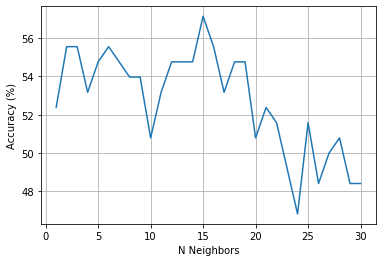

In [10]:
N = []
scores = []
for n in range(1,31):
    N.append(n)
    knn = KNeighborsClassifier(n_neighbors=n)
    scores.append(np.mean(cross_val_score(knn, X, y, scoring='accuracy', cv=kf, n_jobs=-1))*100)
    
plt.plot(N, scores)
plt.xlabel('N Neighbors')
plt.ylabel('Accuracy (%)')
plt.grid(True)

## 1.4 Decision Tree

In [11]:
tree = DecisionTreeClassifier()

scores = cross_val_score(tree, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f'Accuracy (include all): {np.mean(scores)*100}%')

#Drop by variance.

scores = cross_val_score(tree, X_drop_var, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f'Accuracy (variance): {np.mean(scores)*100}%')

#Drop by correlation.

scores = cross_val_score(tree, X_drop_corr, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f'Accuracy (correlation): {np.mean(scores)*100}%')

#Keep by ANOVA

scores = cross_val_score(tree, X_keep_ANOVA, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f'Accuracy (ANOVA): {np.mean(scores)*100}%')

Accuracy (include all): 57.14285714285714%
Accuracy (variance): 51.587301587301596%
Accuracy (correlation): 56.34920634920635%
Accuracy (ANOVA): 64.28571428571429%


## HP Optimisation

In [59]:
#For all variables.

space = {'eta': hp.uniform('eta', 0, 1),
         'gamma': hp.uniform('gamma', 0, 10),
         'max_depth': hp.quniform('max_depth', 1, 20, 1),
         'min_child_weight': hp.quniform('min_child_weight', 0, 10, 1),
         'seed': 0}

def objective(space):
    clf=XGBClassifier(eta=space['eta'],
                      gamma=space['gamma'],
                      max_depth=int(space['max_depth']),
                      min_child_weight=int(space['min_child_weight'])
                     )
    
    scores = cross_val_score(clf, X_keep_ANOVA, y, scoring='accuracy', cv=kf, n_jobs=-1)
    acc = np.mean(scores)
    
    print(f'Score: {acc}')
    return {'loss':-acc, 'status': STATUS_OK}

In [60]:
trials = Trials()

opt = fmin(fn=objective, 
           space=space,
           algo=tpe.suggest,
           max_evals=100,
           trials=trials)

Score: 0.5793650793650794                              
Score: 0.5317460317460317                              
Score: 0.6111111111111112                                                         
Score: 0.5238095238095238                                                         
Score: 0.5317460317460317                                                         
Score: 0.5158730158730159                                                         
Score: 0.5317460317460317                                                         
Score: 0.5793650793650793                                                         
Score: 0.6031746031746031                                                         
Score: 0.5238095238095238                                                         
Score: 0.5238095238095238                                                         
Score: 0.5317460317460317                                                          
Score: 0.5238095238095238                                

In [61]:
print(opt)

{'eta': 0.9211105908862853, 'gamma': 2.092604856723871, 'max_depth': 19.0, 'min_child_weight': 6.0}


In [64]:
xgb_opt = XGBClassifier(eta=opt['eta'], 
                        gamma=opt['gamma'],
                        max_depth=int(opt['max_depth']),
                        min_child_weight=int(opt['min_child_weight'])
                       )

scores = cross_val_score(xgb_opt, X_keep_ANOVA, y, 
                         scoring='accuracy', cv=kf, n_jobs=-1)
print(f'Accuracy: {np.mean(scores)*100}%')
print(scores)

Accuracy: 65.07936507936508%
[0.66666667 0.57142857 0.57142857 0.52380952 0.80952381 0.76190476]
